# Gini

In [9]:
import numpy as np
from numba import jit

In [10]:
@jit
def gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n - 1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

# What is the Gini?

The Gini coefficient is a measure of inequality that can be calculated using the following steps

Rank the values of the variable being measured in ascending order.
Calculate the cumulative relative frequency of each value, which is the proportion of observations with values less than or equal to that value.
Calculate the Lorenz curve, which plots the cumulative relative frequency on the y-axis and the rank of the values on the x-axis.
Calculate the Gini coefficient by dividing the area between the Lorenz curve and the line of perfect equality (where the cumulative relative frequency is equal to the rank of the values) by the total area under the line of perfect equality.

We use the gini coefficient since we are relating the problem back to insurance - Gini is a vital metric in insurance because we care more about segregating high and low risks than predicting losses. A higher gini is going to mean our model is better able to tell between high risk and low risk cases.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate
import scipy.integrate

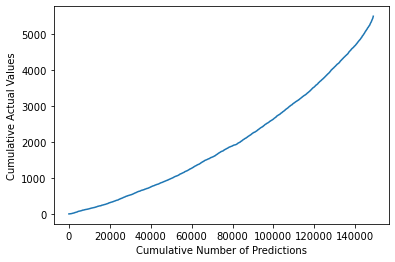

In [12]:
boosting_preds = pd.read_csv("Results/lgbm_bayesian_opt.csv")['target'].values
targets = pd.read_csv("Dataset/target_test.csv")['target'].values

data = zip(targets, boosting_preds)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]

# Sum up the actual values
cumulative_actual = np.cumsum(sorted_actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1)

plt.plot(cumulative_index, cumulative_actual)
plt.xlabel('Cumulative Number of Predictions')
plt.ylabel('Cumulative Actual Values')
plt.show()

This corresponds to the Lorenz Curve.

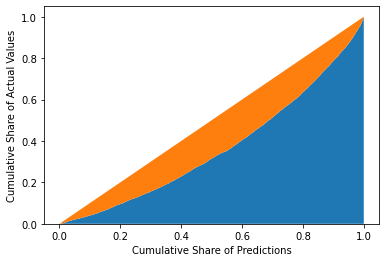

In [13]:
cumulative_actual_shares = cumulative_actual / sum(targets)
cumulative_index_shares = cumulative_index / len(boosting_preds)

# Add (0, 0) to the plot
x_values = [0] + list(cumulative_index_shares)
y_values = [0] + list(cumulative_actual_shares)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values)]

plt.stackplot(x_values, y_values, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()




Our gini coefficient is then calculated by taking the orange area. (the triangle minus the area under the Lorenz Curve

If we were to randomly guess, our gini coefficient would be 0

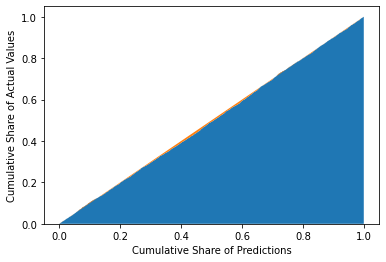

In [14]:
import random
guess = []
for i in range(len(targets)):
    randomint = random.randint(0, 1)
    guess.append(randomint)

data = zip(targets, guess)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]

# Sum up the actual values
cumulative_actual = np.cumsum(sorted_actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1)

cumulative_actual_shares = cumulative_actual / sum(targets)
cumulative_index_shares = cumulative_index / len(guess)

# Add (0, 0) to the plot
x_values = [0] + list(cumulative_index_shares)
y_values = [0] + list(cumulative_actual_shares)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values)]

plt.stackplot(x_values, y_values, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()

# Comparison of Gini Scores from our model

In [23]:
baseline = pd.read_csv("Results/baseline_preds.csv")['predictions']
knn = pd.read_csv("Results/knns.csv")['1']
lasso = pd.read_csv("Results/lasso_preds.csv")['s0']
lightgbm_bay = pd.read_csv("Results/lgbm_bayesian_opt.csv")['target']
targets = pd.read_csv("Dataset/target_test")['target']

models = ['Baseline', 'LASSO', 'KNN', 'LightGBM']
preds = [baseline, lasso, knn, lightgbm_bay]
gini_scores = []
j = 0
for i in preds:
    gini_scores.append(gini(targets, i))
    print(models[j], gini_scores[j])
    j+=1


Baseline 0.25490761823729324
LASSO 0.2556699128124136
KNN 0.11599799913885367
LightGBM 0.2817052971888222
